In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import sklearn.linear_model
import sklearn.ensemble
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
df=pd.read_csv("new_ds_of_miss")

In [3]:
df.head()

,Unnamed: 0,0,age,surviving_total,mother_age_when_baby_was_born,outcome_pregnancy,is_currently_pregnant,aware_of_the_danger_signs,occupation_status,disability_status,...,sought_medical_care,diagnosed_for,diagnosis_source,regular_treatment,regular_treatment_source,chew,smoke,alcohol,status,client_hl_id
0,0,0,25,2,20,1,2,1,6,0,...,0,0,0,0,0,7,4,4,1,1155
1,1,1,31,2,23,2,2,1,10,0,...,0,0,0,0,0,7,4,4,1,1156
2,2,2,35,2,24,2,2,2,10,0,...,0,0,0,0,0,7,4,4,1,1159
3,3,3,49,5,17,2,2,1,10,0,...,0,0,0,0,0,5,4,4,1,1160
4,4,4,46,1,19,2,0,0,4,0,...,0,0,0,0,0,7,4,4,1,1161


In [4]:
df.shape

(5078, 24)

In [5]:
to_drop= ["Unnamed: 0","0"]

In [6]:
df.drop(to_drop, axis=1,inplace=True)

In [7]:
df.isnull()

,age,surviving_total,mother_age_when_baby_was_born,outcome_pregnancy,is_currently_pregnant,aware_of_the_danger_signs,occupation_status,disability_status,injury_treatment_type,illness_type,...,sought_medical_care,diagnosed_for,diagnosis_source,regular_treatment,regular_treatment_source,chew,smoke,alcohol,status,client_hl_id
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5073,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5074,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5075,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5076,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

age                              0
surviving_total                  0
mother_age_when_baby_was_born    0
outcome_pregnancy                0
is_currently_pregnant            0
aware_of_the_danger_signs        0
occupation_status                0
disability_status                0
injury_treatment_type            0
illness_type                     0
treatment_source                 0
symptoms_pertaining_illness      0
sought_medical_care              0
diagnosed_for                    0
diagnosis_source                 0
regular_treatment                0
regular_treatment_source         0
chew                             0
smoke                            0
alcohol                          0
status                           0
client_hl_id                     0
dtype: int64

In [10]:
bin_size=np.sqrt(len(df))

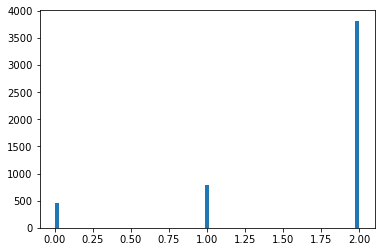

In [11]:
plt.hist(df['outcome_pregnancy'],bins= int(bin_size))
plt.show()

In [12]:
print(df.outcome_pregnancy.mean())
print(df.outcome_pregnancy.median())
print(df.outcome_pregnancy.mode())

1.6595116187475385
2.0
0    2
dtype: int64


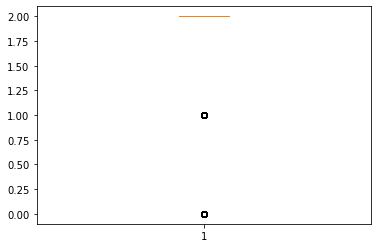

In [13]:
plt.boxplot(df['outcome_pregnancy'])
plt.show()

In [358]:
# To work with the date
import datetime
# We will be working with pandas
import pandas as pd

# To visualize the results
import matplotlib.pyplot as plt
import seaborn as sns

In [366]:
# Set the parameter for the size of the plot we want
plt.rcParams["figure.figsize"] = (40,35)

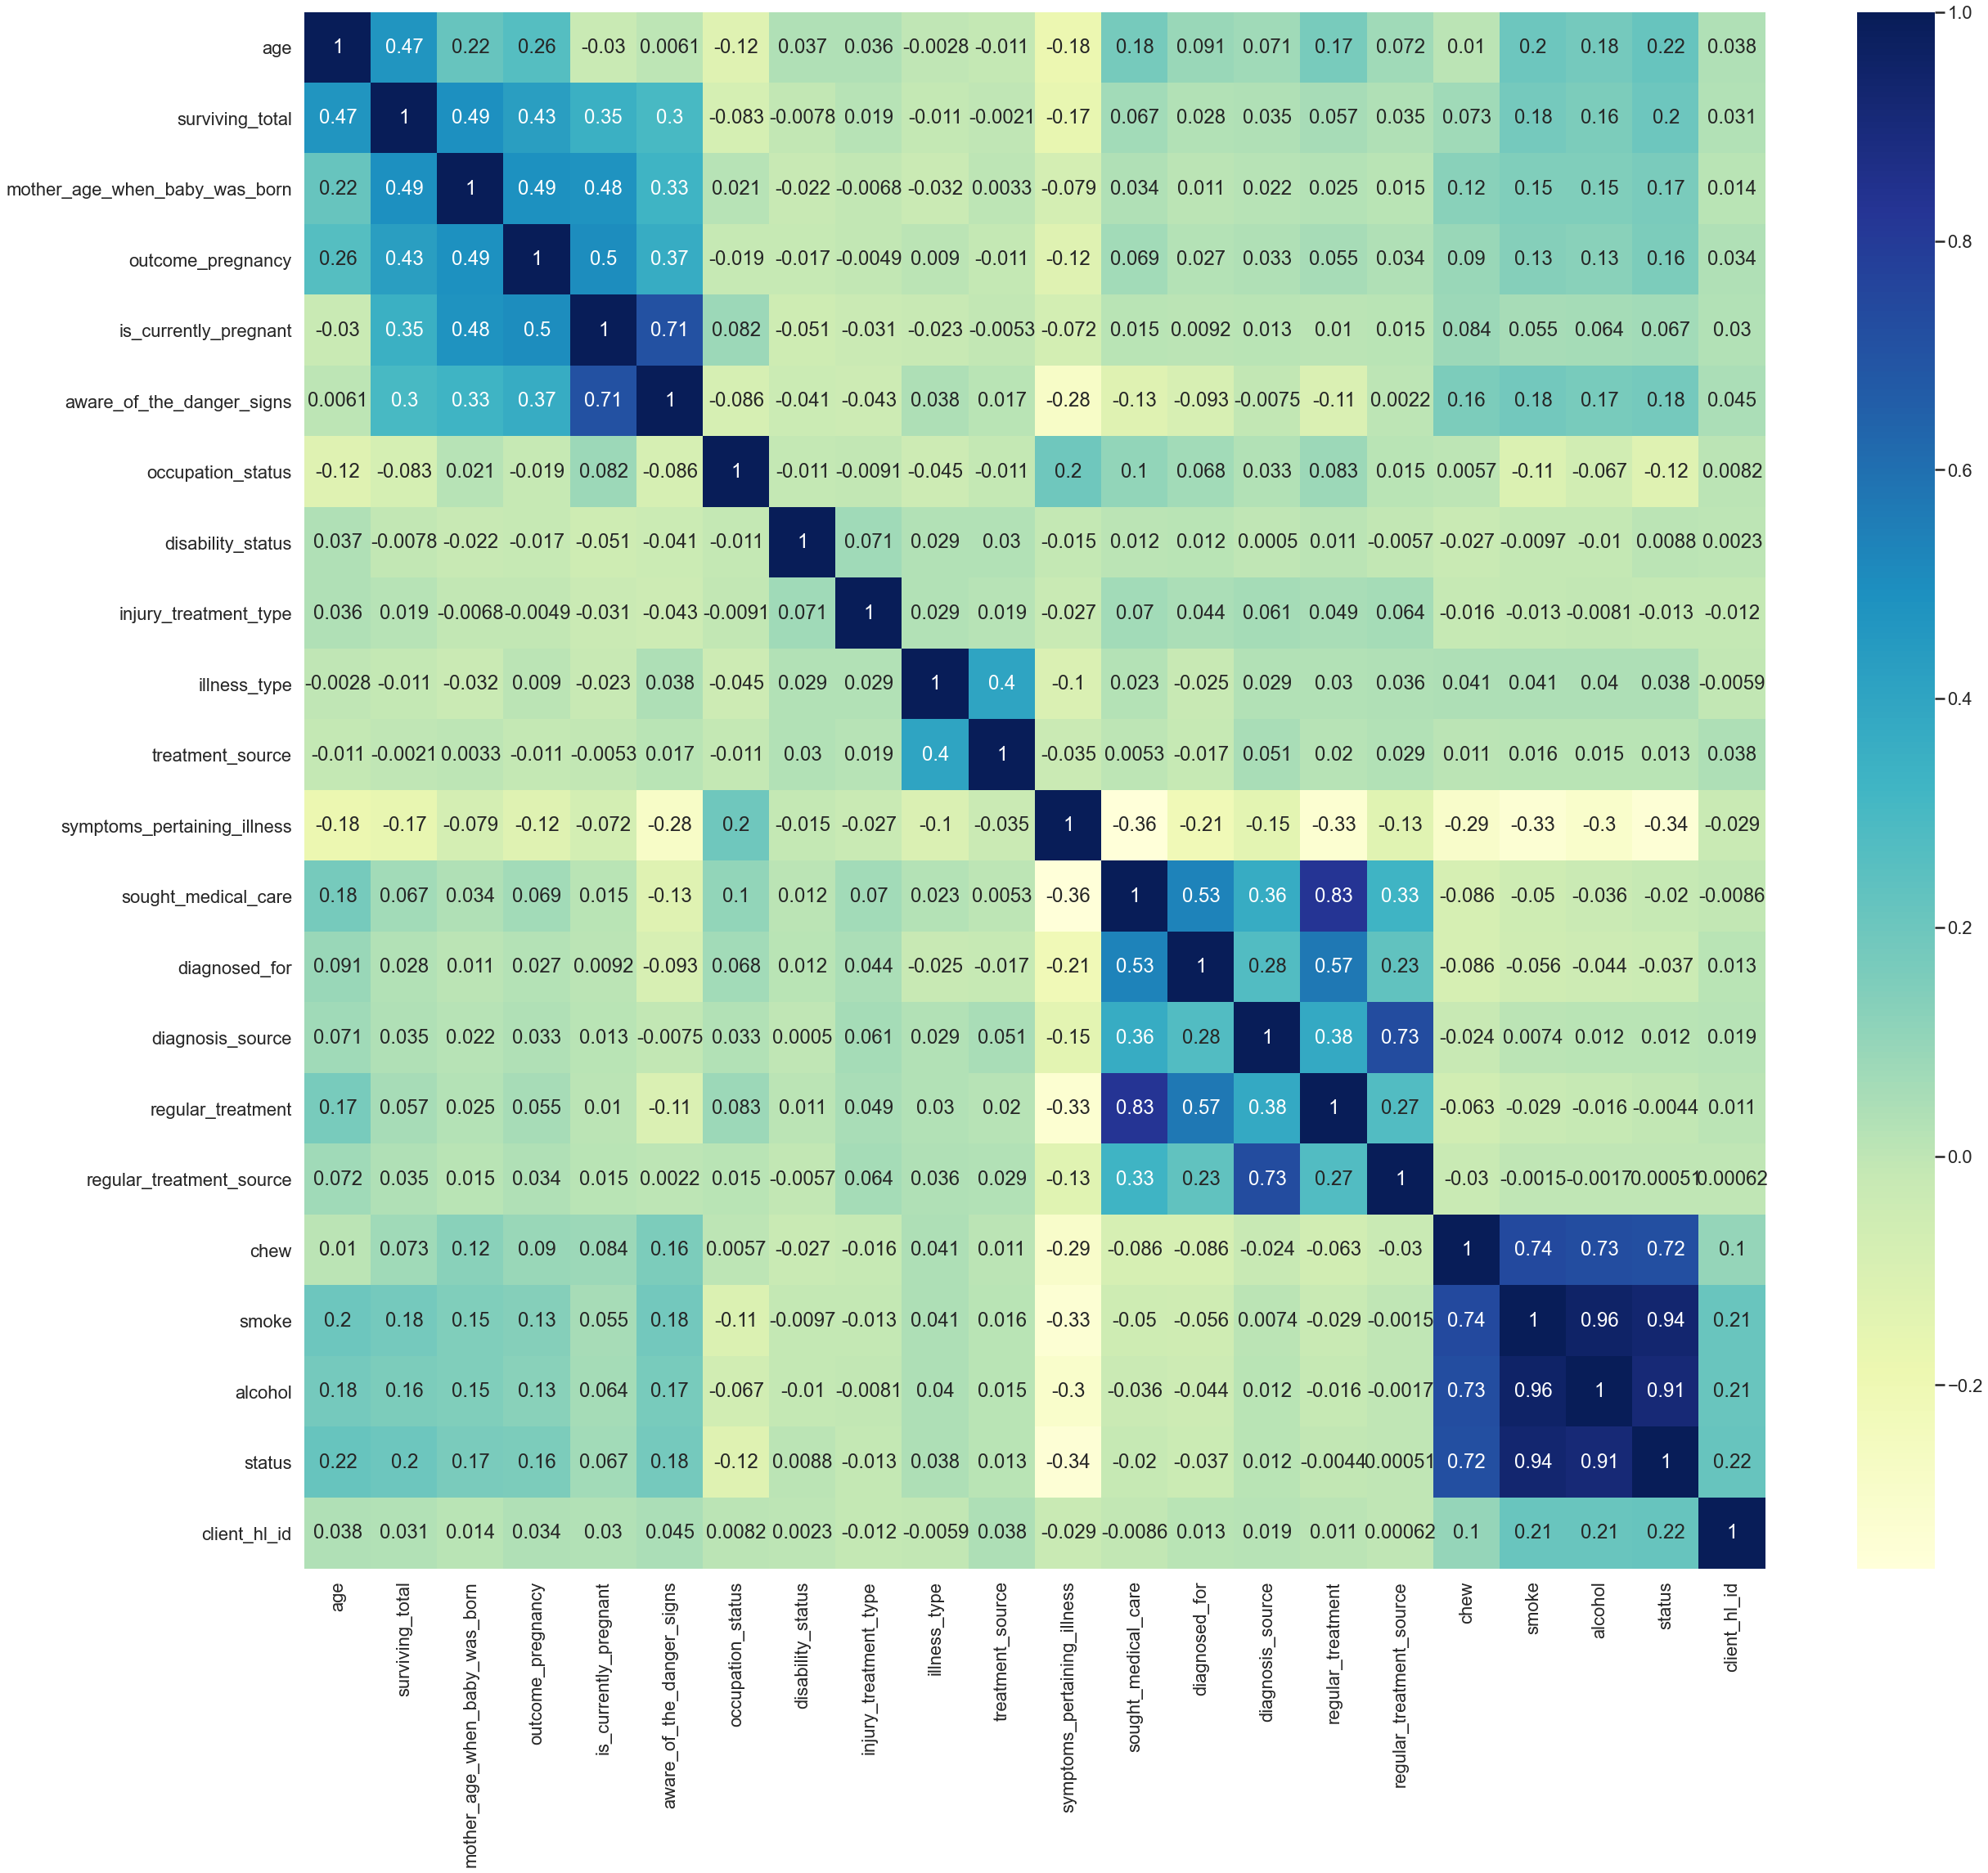

In [367]:
# Plot the correlation heatmap
sns.heatmap(df.corr(), cmap="YlGnBu", annot=True);

In [274]:
feature_col=['age', 'aware_of_the_danger_signs', 'diagnosed_for',  'chew', 'smoke',
             'alcohol','is_currently_pregnant']
X = df[feature_col] # Features
y = df.outcome_pregnancy # Target variable

In [275]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [276]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [280]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [281]:
Y_pred = classifier.predict(X_test)

In [282]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[ 91   0  24]
 [  1   0 187]
 [ 67   0 900]]


Text(0.5, 637.6, 'Predicted label')

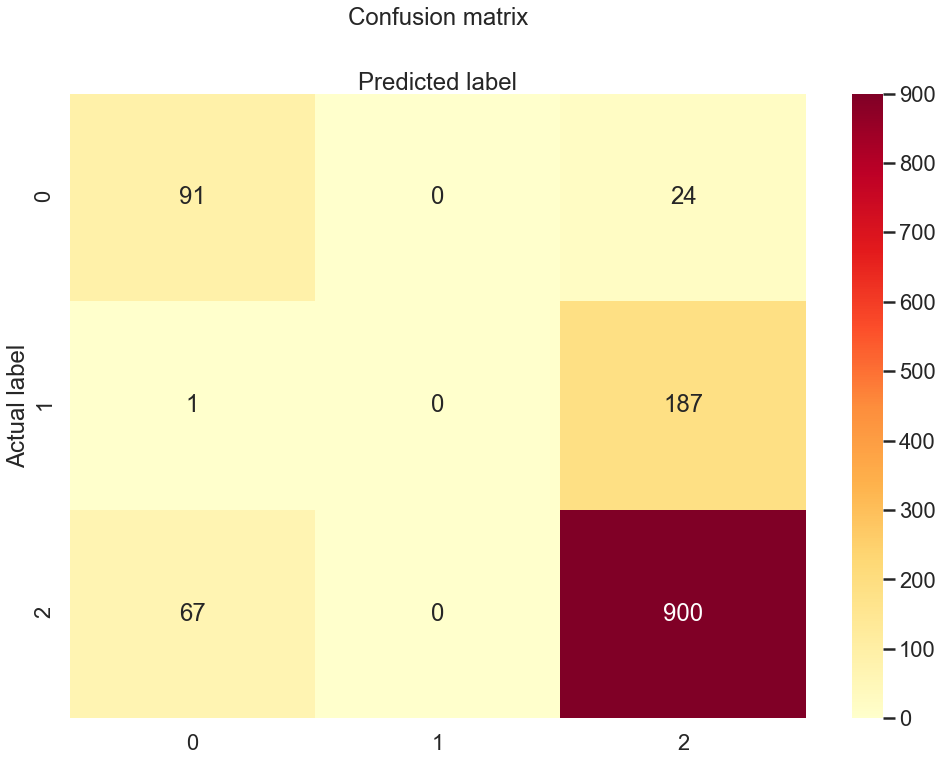

In [356]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlOrRd" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

#  SVC method of svm class to use Kernel SVM Algorithm

In [283]:

from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

In [284]:
from sklearn.metrics import confusion_matrix
tm = confusion_matrix(y_test, Y_pred)
print(cm)

[[ 91   0  24]
 [  1   0 187]
 [ 67   0 900]]


Text(0.5, 637.6, 'Predicted label')

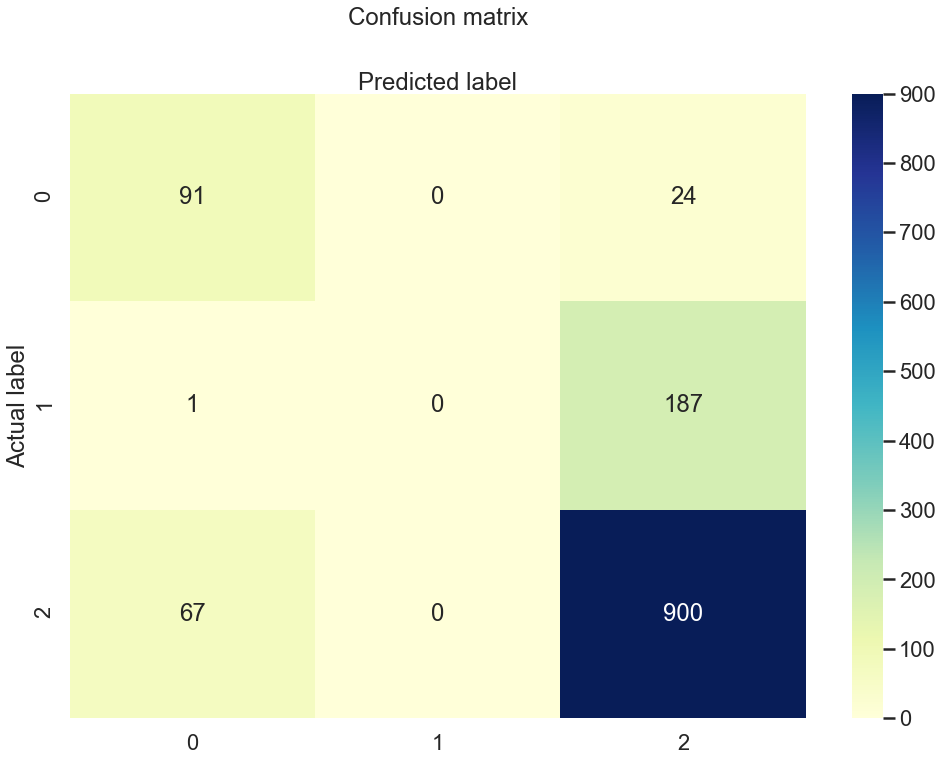

In [353]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

# Using GaussianNB method of naïve_bayes class to use Naïve Bayes Algorithm

In [30]:

from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [31]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_pred)
print(cm)

[[ 91   0  24]
 [  1   0 187]
 [ 67   0 900]]


# Decision tree 

In [285]:
feature_col=['age',  'chew', 'smoke',
             'alcohol','is_currently_pregnant']
X = df[feature_col] # Features
y = df.outcome_pregnancy # Target variable

In [286]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [287]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [289]:
# Model Accuracy, how often is the classifier correct?
from sklearn import metrics
from sklearn import preprocessing
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

Accuracy: 76.9028871391076


#  Ensemble Method 

In [39]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn. ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
modelNB = MultinomialNB()
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report

In [188]:
df.tail()

,age,surviving_total,mother_age_when_baby_was_born,outcome_pregnancy,is_currently_pregnant,aware_of_the_danger_signs,occupation_status,disability_status,injury_treatment_type,illness_type,...,sought_medical_care,diagnosed_for,diagnosis_source,regular_treatment,regular_treatment_source,chew,smoke,alcohol,status,client_hl_id
5073,26,2,22,2,2,1,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5074,31,3,21,2,2,1,10,0,0,0,...,2,99,8,2,8,0,0,0,0,0
5075,27,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5076,38,2,23,2,2,1,10,0,0,0,...,0,0,0,0,0,7,4,4,1,1058
5077,28,2,20,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [290]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [291]:
#decision tree
dt = DecisionTreeClassifier()
dt.fit(x_test,y_test)

DecisionTreeClassifier()

In [292]:
dt.score(x_test,y_test)

0.8293963254593176

In [293]:
dt.score(x_train,y_train)

0.7630838491840181

In [294]:
modelNB = MultinomialNB()
modelNB.fit(x_train,y_train)
modelNB.score(x_train, y_train)

0.7622397298818233

In [295]:
svm = SVC(gamma='auto')
svm.fit(x_train, y_train)
svm.score(x_train, y_train)

0.808947664603264

In [296]:
#Random Forest - Ensemble of Descision Trees

rf = RandomForestClassifier(n_estimators=30)
rf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=30)

In [297]:
rf.score(x_train,y_train)

0.8216094541361846

In [341]:
#Ensemble Bagging 
bg = BaggingClassifier(DecisionTreeClassifier(), max_samples= 0.001, max_features = 1.0, n_estimators = 10)
bg.fit(x_train,y_train)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), max_samples=0.001)

In [342]:
bg.score(x_test,y_test)

0.7401574803149606

In [343]:
bg.score(x_train,y_train)

0.7560495216657288

In [314]:
#Ensemble Boosting - Ada Boost

adb = AdaBoostClassifier(DecisionTreeClassifier(),n_estimators = 4, learning_rate = 4)
adb.fit(x_train,y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), learning_rate=4,
                   n_estimators=4)

In [315]:
adb.score(x_test,y_test)

0.5183727034120735

In [316]:
adb.score(x_train,y_train)

0.5486775464265616

# Voting Classifier - Multiple Model Ensemble 

lr = LogisticRegression()
dt = DecisionTreeClassifier()
svm = SVC(kernel = 'poly', degree = 2 )

In [318]:
evc = VotingClassifier( estimators= [('lr',lr),('svm',svm)], voting = 'hard')

#result

In [320]:
evc.score(x_test, y_test)

0.7703412073490814

In [368]:
evc = VotingClassifier( estimators= [('lr',lr),('svm',svm),('dt',dt)], voting = 'hard')

In [369]:
evc.fit(x_train,y_train)

/Users/sagarsingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('svm', SVC(degree=2, kernel='poly')),
                             ('dt', DecisionTreeClassifier())])

In [370]:
evc.score(x_test, y_test)

0.7808398950131233

 #Voting Classifier

In [321]:
from sklearn.metrics import classification_report
from sklearn import metrics
y_expected=y_test
y_pred=evc.predict(X_test)
print(metrics.classification_report(y_expected,y_pred))

              precision    recall  f1-score   support

           0       0.09      0.07      0.08       156
           1       0.10      0.04      0.06       240
           2       0.73      0.86      0.79      1128

    accuracy                           0.65      1524
   macro avg       0.31      0.32      0.31      1524
weighted avg       0.57      0.65      0.60      1524



In [322]:
#adaboost
from sklearn.metrics import classification_report
from sklearn import metrics
y_expected=y_test
y_pred=adb.predict(X_test)
print(metrics.classification_report(y_expected,y_pred))

              precision    recall  f1-score   support

           0       0.11      0.44      0.17       156
           1       0.25      0.05      0.08       240
           2       0.72      0.54      0.61      1128

    accuracy                           0.45      1524
   macro avg       0.36      0.34      0.29      1524
weighted avg       0.58      0.45      0.48      1524



In [87]:
#random forest
from sklearn.metrics import classification_report
from sklearn import metrics
y_expected=y_test
y_pred=rf.predict(X_test)
print(metrics.classification_report(y_expected,y_pred))

              precision    recall  f1-score   support

           0       0.10      0.08      0.09       143
           1       0.17      0.08      0.11       246
           2       0.75      0.86      0.80      1135

    accuracy                           0.66      1524
   macro avg       0.34      0.34      0.33      1524
weighted avg       0.59      0.66      0.62      1524



In [323]:
conda config --add channels conda-forge


Note: you may need to restart the kernel to use updated packages.


In [324]:
conda install -c conda-forge umap-learn

Solving environment: done

## Package Plan ##

  environment location: /Users/sagarsingh/opt/anaconda3

  added / updated specs:
    - umap-learn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-22.9.0               |   py38h50d1736_2         966 KB  conda-forge
    pynndescent-0.5.8          |     pyh1a96a4e_0          47 KB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    umap-learn-0.5.3           |   py38h50d1736_0         132 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.1 MB

The following NEW packages will be INSTALLED:

  pynndescent        conda-forge/noarch::pynndescent-0.5.8-pyh1a96a4e_0 None
  python_abi         conda-forge/osx-64::python_abi-3.8-2_cp38 None
  umap-learn         conda-forge/osx-64::umap-learn-0.5.3-py38h50d1736_0 

Data Visualization

In [325]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import umap
%matplotlib inline

In [344]:
sns.set(style='white', context='poster', rc={'figure.figsize':(14,10)})

In [349]:
np.random.seed(42)
data = np.random.rand(5078, 4)

In [350]:
fit = umap.UMAP()
%time u = fit.fit_transform(df)

/Users/sagarsingh/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_spectral_embedding.py:259: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


CPU times: user 15.8 s, sys: 923 ms, total: 16.7 s
Wall time: 3.59 s


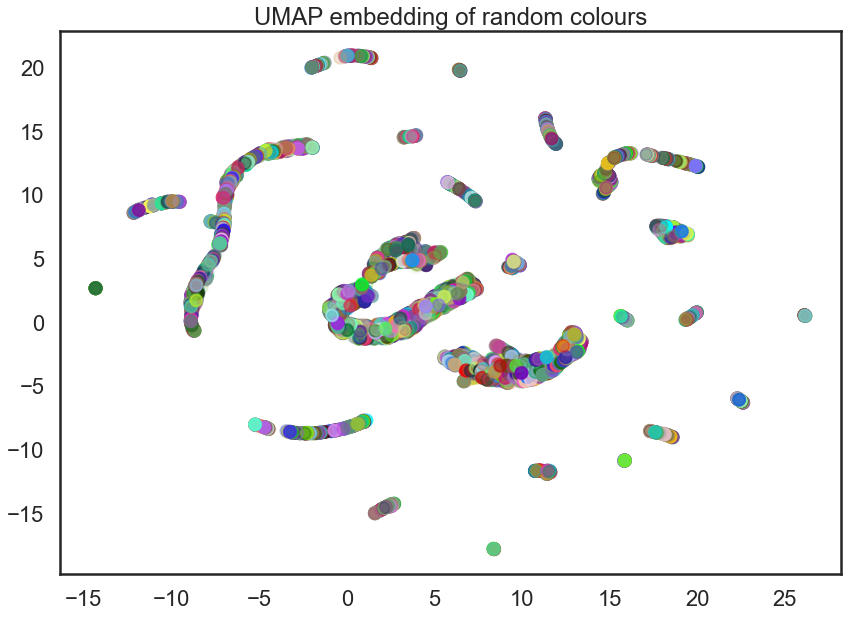

In [351]:
plt.scatter(u[:,0], u[:,1], c=data)
plt.title('UMAP embedding of random colours');